WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done
              vwretd  daily_vol
date                           
2024-12-17 -0.004805   7.130821
2024-12-18 -0.031161  13.276523
2024-12-19 -0.001381  13.158392
2024-12-20  0.010642  13.714046
2024-12-23  0.005633  13.622955
2024-12-24  0.010566  13.992445
2024-12-26  0.000346  13.911321
2024-12-27 -0.010692  14.324744
2024-12-30 -0.009878  14.661696
2024-12-31 -0.003392  14.484533


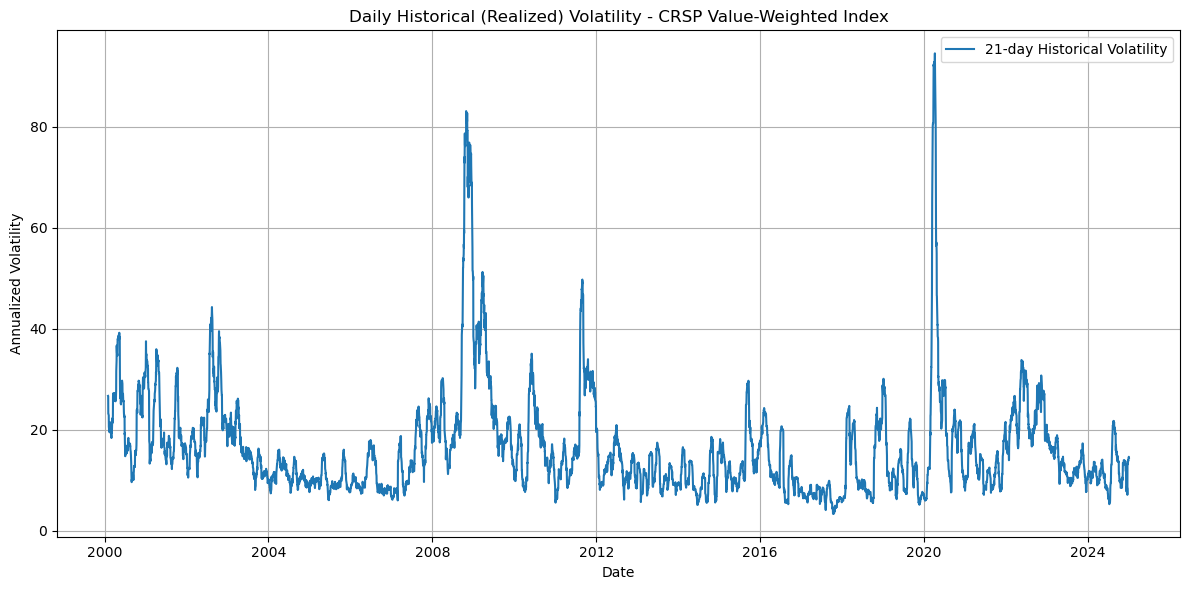

In [2]:
import wrds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------
# 1. Connect to WRDS
# -----------------------------------------------------
db = wrds.Connection()  # Will prompt for your WRDS credentials

# -----------------------------------------------------
# 2. Pull daily CRSP value-weighted market returns
# -----------------------------------------------------
# 'vwretd' = daily value-weighted return (includes dividends)
# This is essentially the CRSP market index, often used as S&P500 proxy
query = """
    SELECT date, vwretd
    FROM crsp.dsi
    WHERE date >= '2000-01-01'
    ORDER BY date;
"""
df = db.raw_sql(query)

# Clean and prepare
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.dropna(subset=['vwretd'])

# -----------------------------------------------------
# 3. Compute daily historical volatility
# -----------------------------------------------------
# 21-day rolling volatility (≈ 1 month)
window = 21
df['daily_vol'] = df['vwretd'].rolling(window=window).std() * np.sqrt(252)
df['daily_vol'] = df['daily_vol'] * 100


# -----------------------------------------------------
# 4. Display recent data
# -----------------------------------------------------
print(df.tail(10))

# -----------------------------------------------------
# 5. Plot daily historical volatility
# -----------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['daily_vol'], label=f'{window}-day Historical Volatility', color='tab:blue')
plt.title('Daily Historical (Realized) Volatility - CRSP Value-Weighted Index')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 6. Save for later use
# -----------------------------------------------------
df[['daily_vol']].to_csv("daily_historical_volatility.csv")

db.close()
